<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
    <!-- Logo positioned in the right corner -->
    <img src="logo.png" style="position: absolute; top: 10px; right: 10px; width: 100px;"/>

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 5%; transform: translateX(-50%); color: grey; text-align: left;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>

<h1 style="text-align: center; color: purple;">👤 Face Detection and Gender Prediction Project 🤖</h1>



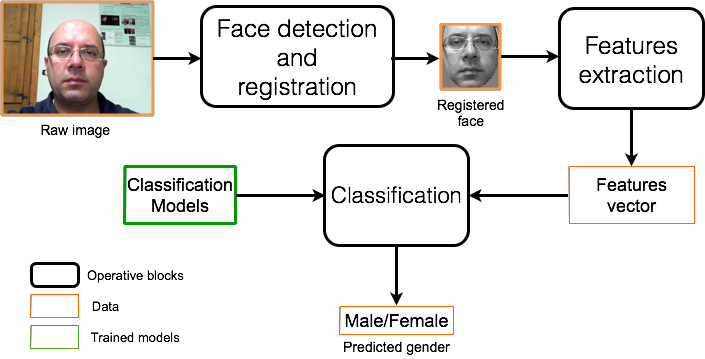

## 🧑‍🏫 Introduction to Face Detection and Gender Prediction

Before we dive into our code, let's understand some cool concepts! 🎉

### 1. **What is OpenCV? 🖼️**
OpenCV (Open Source Computer Vision Library) is a powerful tool that helps computers "see" and understand images and videos, just like we do! It allows us to do things like detect faces, recognize objects, and much more.

### 2. **Understanding Face Detection 👀**
- **Face Detection** is like a magic trick where a computer finds faces in pictures or videos! We use special models called **Haar Cascades** that have been trained to recognize faces.
- Imagine you’re playing hide and seek, and someone has a special pair of glasses that can see all the hidden faces! That’s what face detection does.

### 3. **Deep Learning and Gender Prediction 🤖**
- **Deep Learning** is a type of machine learning inspired by how our brains work. It helps computers learn from lots of examples.
- We can use deep learning to predict if someone is a "Male" or "Female" based on their face. Think of it like playing a guessing game, but the computer has learned from many pictures to make accurate guesses!

### 4. **Working with Webcam 🎥**
- A **webcam** is like your computer's eyes. We can capture video in real-time to see what’s happening right now, just like a live show!

### 5. **How Does It All Work Together? 🔗**
- We will combine OpenCV with our webcam to detect faces and then use our deep learning model to predict gender based on those faces. It’s like creating our own mini face recognition app!

---

With these concepts in mind, you're ready to explore the code! Let’s get started! 🚀


In [1]:
!pip install opencv-python-headless
!pip install opencv-contrib-python

## haarcascade_frontalface_default.xml
- This file is used to **detect faces** in an image or video.
- OpenCV uses it to find the location of faces based on pre-trained data.

## gender_deploy.prototxt
- This file defines the **structure** of the deep learning model used for gender prediction.

## gender_net.caffemodel
- This file contains the **trained weights** of the deep learning model to predict whether a face is Male or Female.


In [ ]:
### Simple Explanation for Each Line of Code:

```python
# Importing the necessary libraries to use OpenCV
import cv2

# Loading the face detection model (haarcascade), which helps in finding faces in an image or video
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Loading the model files for gender prediction using deep learning models (from Caffe)
gender_net = cv2.dnn.readNetFromCaffe('gender_deploy.prototxt', 'gender_net.caffemodel')

# Capturing video from the computer's webcam
cap = cv2.VideoCapture(0)

# Start a loop to process video frames continuously
while True:
    # Read a frame from the webcam
    _, img = cap.read()

    # Convert the video frame into a grayscale image (black and white) for better face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Loop through all the detected faces
    for (x, y, w, h) in faces:
        # Extract the part of the image where the face is located (Region of Interest - ROI)
        face_roi = img[y:y + h, x:x + w]

        # Prepare the face image for prediction using the gender model
        blob = cv2.dnn.blobFromImage(face_roi, scalefactor=1.0, size=(227, 227),
                                     mean=(78.4263377603, 87.7689143744, 114.895847746),
                                     swapRB=False, crop=False)

        # Set the prepared face image as input to the gender model
        gender_net.setInput(blob)

        # Predict the gender (Male or Female) based on the input face
        gender_preds = gender_net.forward()

        # Choose "Male" if the first prediction is stronger, otherwise choose "Female"
        gender = "Male" if gender_preds[0][0] > gender_preds[0][1] else "Female"

        # Draw a blue rectangle around the detected face
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Create a label that shows the predicted gender
        label = f"Gender: {gender}"

        # Display the label (Gender) on the video, near the face
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Show the video with the detected faces and gender
    cv2.imshow('img', img)

    # Check if the "Esc" key is pressed to stop the program
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

# When the loop is finished, release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
